# 2 Thermophysical Properties

In [1]:
from models_2_0 import *
from plots_2_0 import *
from CleanPlots import *
from CleanModels import *

excel_filename = 'Eurofer_data_1_2.xlsx'
material_name = "Eurofer"

# Temperature range and initializations
T = np.arange(300, 1000, 10)
n = len(T)
RT = 273
f_size = 10
legend_size = 6
m_size = 60

## 2.1 Density

,EUROFER97TempK,EUROFER97DensityKg_m_3
0,293,7750
1,373,7728
2,473,7699
3,573,7666
4,673,7633
5,773,7596
6,873,7558


Data source: [Tavassoli2004a--Materials design data for reduced activation martensitic steel type EUROFER](https://drive.google.com/file/d/1AZkRc7VNqWhjE_3Mg22TUoUSLKh5ByXQ/view?usp=sharing)

**Fitting parameters for Eurofer Density** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 7
    # variables        = 4
    chi-square         = 0.93153508
    reduced chi-square = 0.31051169
    Akaike info crit   = -6.11782107
    Bayesian info crit = -6.33418047
    R-squared          = 0.99996842
[[Variables]]
    c0:  7815.18139 +/- 7.14476422 (0.09%) (init = 1)
    c1: -0.18035419 +/- 0.04145811 (22.99%) (init = 1)
    c2: -1.5050e-04 +/- 7.4870e-05 (49.75%) (init = 1)
    c3:  2.2447e-08 +/- 4.2592e-08 (189.75%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9962
    C(c1, c2) = -0.9950
    C(c0, c1) = -0.9933
    C(c1, c3) = +0.9828
    C(c0, c2) = +0.9777
    C(c0, c3) = -0.9575


**The equations for Eurofer Density are:**


Fit:


<IPython.core.display.Latex object>

Minimum of confidence interval:


<IPython.core.display.Latex object>

Maximum of confidence interval:


<IPython.core.display.Latex object>

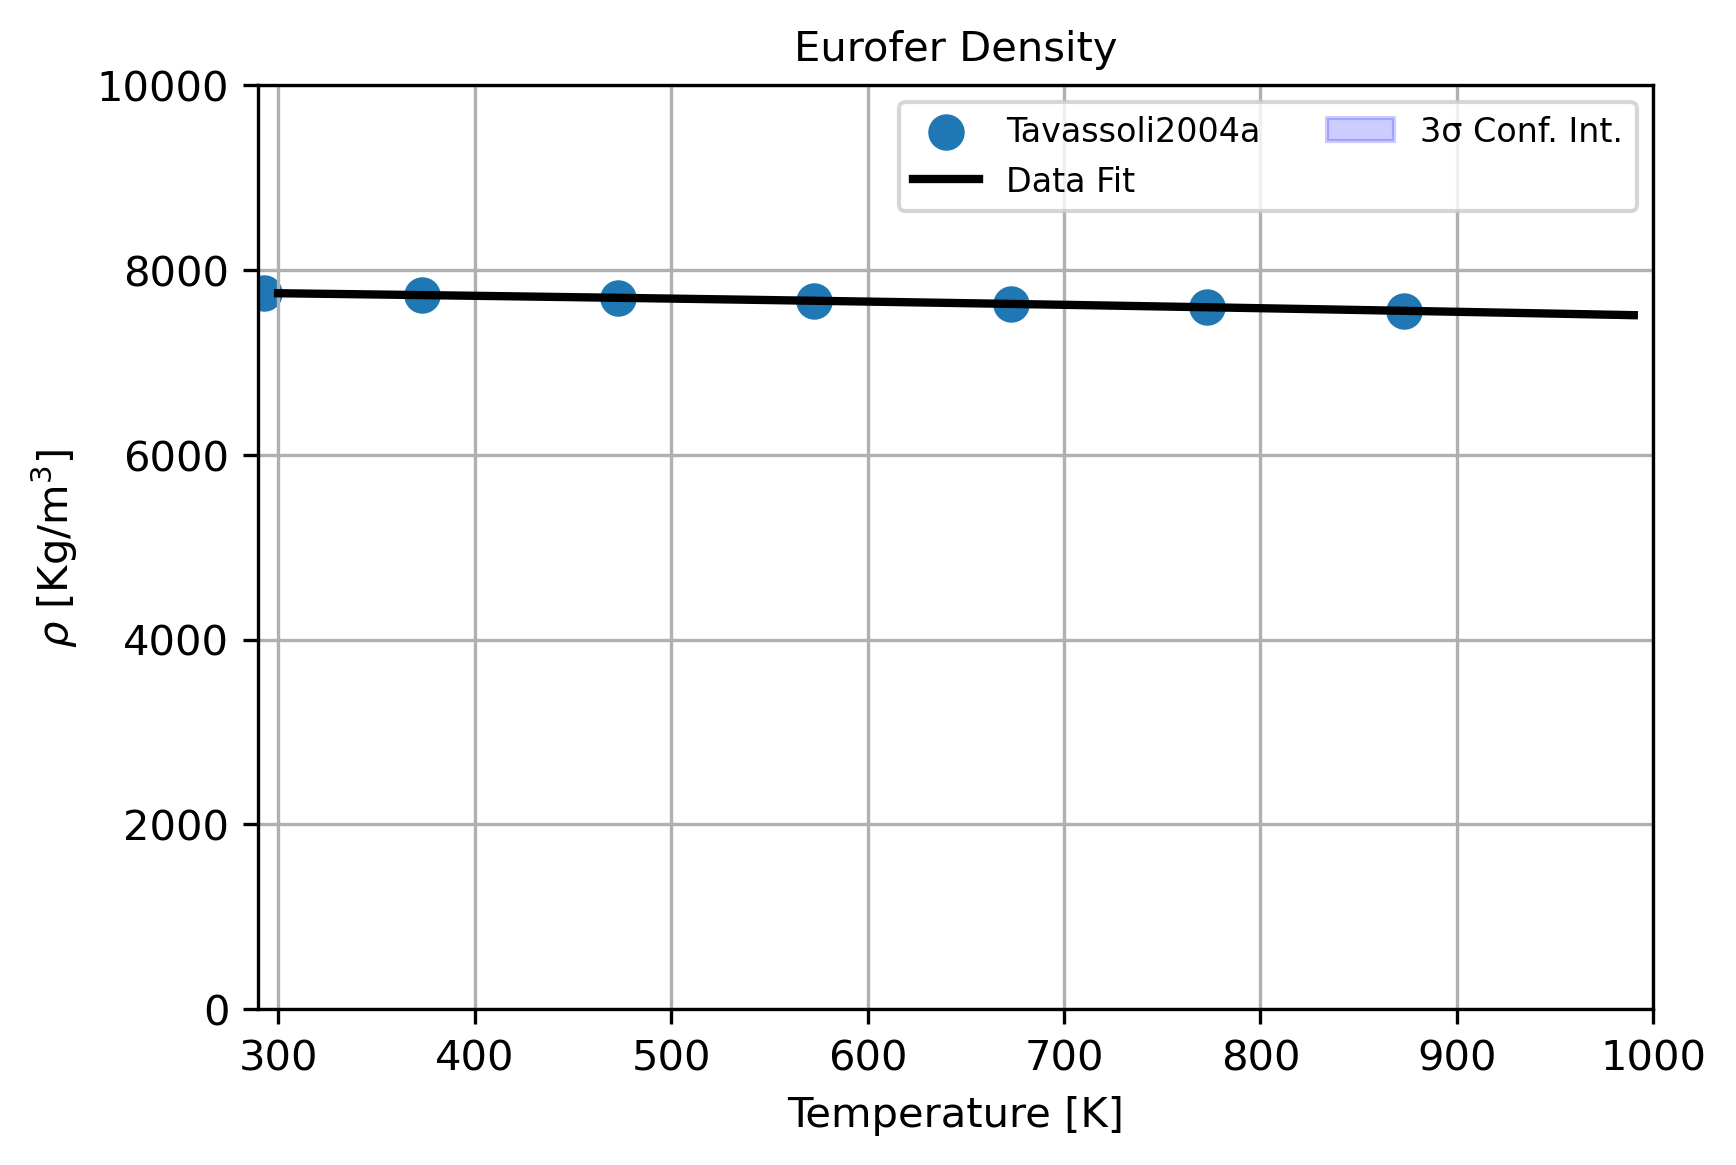

In [2]:
# Load excel data for desired property name
material_property = "Density"
var_names, variables, dataframe = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=7)

x_label = 'Temperature [K]'
y_label = r'$\rho$ [Kg/m$^3$]'
x_lim = [290, 1000]
y_lim = [0, 10000]
data_labels = ['Tavassoli2004a']
display(Markdown('Data source: [Tavassoli2004a--Materials design data for reduced activation martensitic steel type EUROFER](https://drive.google.com/file/d/1AZkRc7VNqWhjE_3Mg22TUoUSLKh5ByXQ/view?usp=sharing)'))

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = vars_y

# Fit the data

p = [1, 1, 1, 1]
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=4, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          'Eurofer Density', legend_font_size= 8)

density_coef = [fit_result.params[key].value for key in fit_result.params]  # Extract parameter values as a list

# Define the polynomial function
def Density(T):
    return sum(density_coef[i] * T**i for i in range(len(density_coef)))

## 2.2 Thermal Diffusivity

,EUROFER97MergiaTempK,EUROFER97MergiaThermalDiffusivityCoefcm2/s
0,295.595855,0.081641
1,322.797927,0.080790
2,373.316062,0.077536
3,472.797927,0.075784
4,573.056995,0.070729
5,673.316062,0.064822
6,772.797927,0.058014
7,873.056995,0.050256


Data source: [Mergia2008--Structural, thermal, electrical and magnetic properties of Eurofer 97 steel.pdf](https://drive.google.com/file/d/16dzPWsjkJab4v0_DAryCNMEoq1FnAGZw/view?usp=drive_link)

**Fitting parameters for Eurofer Diffusivity** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 8
    # variables        = 4
    chi-square         = 2.4812e-06
    reduced chi-square = 6.2029e-07
    Akaike info crit   = -111.889799
    Bayesian info crit = -111.572033
    R-squared          = 0.99725225
[[Variables]]
    c0:  0.08964800 +/- 0.01017097 (11.35%) (init = 1)
    c1: -2.8541e-05 +/- 5.9295e-05 (207.75%) (init = 1)
    c2:  1.2037e-08 +/- 1.0716e-07 (890.27%) (init = 1)
    c3: -3.5759e-11 +/- 6.0929e-11 (170.38%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9965
    C(c1, c2) = -0.9957
    C(c0, c1) = -0.9950
    C(c1, c3) = +0.9847
    C(c0, c2) = +0.9822
    C(c0, c3) = -0.9646


**The equations for Eurofer Diffusivity are:**


Fit:


<IPython.core.display.Latex object>

Minimum of confidence interval:


<IPython.core.display.Latex object>

Maximum of confidence interval:


<IPython.core.display.Latex object>

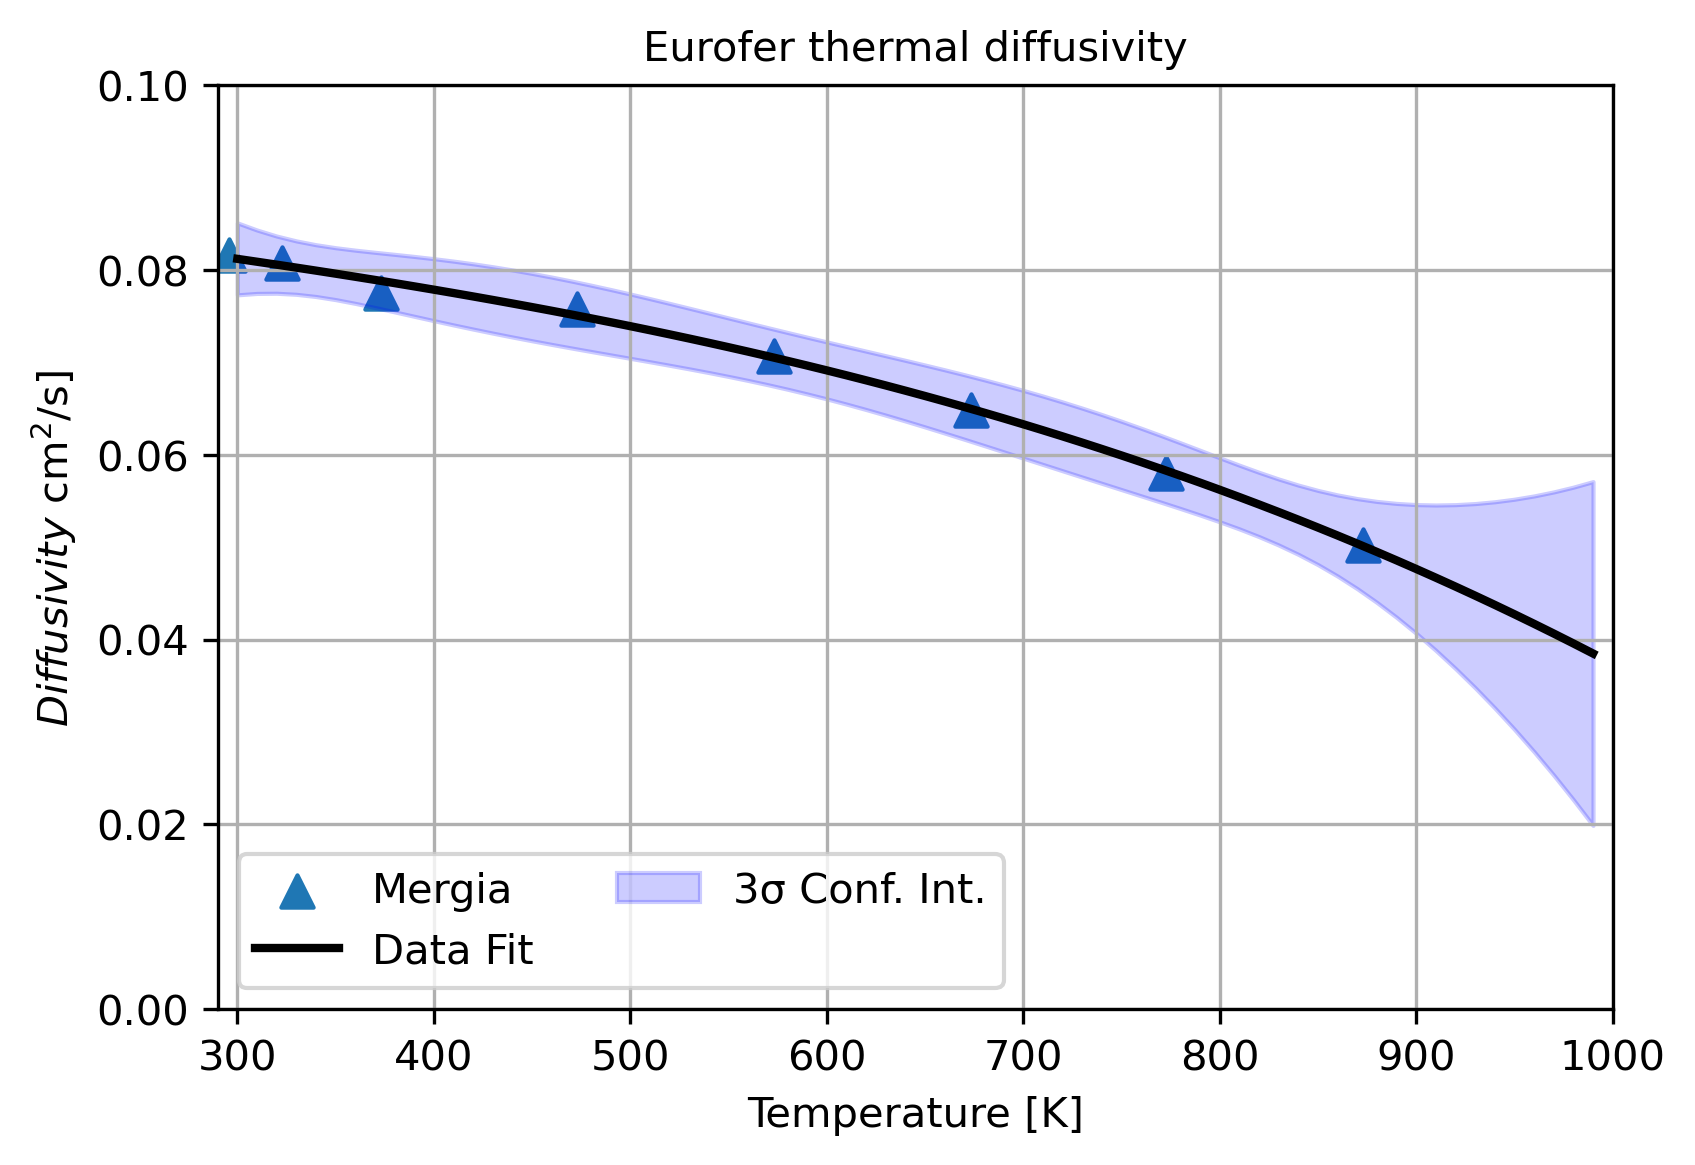

In [3]:
material_property = "Diffusivity"
var_names, variables, dataframe = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=8)
x_label = 'Temperature [K]'
y_label = r'$Diffusivity$ cm$^2$/s]'
x_lim = [290, 1000]
y_lim = [0, 0.1]
data_labels = ['Mergia']
display(Markdown('Data source: [Mergia2008--Structural, thermal, electrical and magnetic properties of Eurofer 97 steel.pdf](https://drive.google.com/file/d/16dzPWsjkJab4v0_DAryCNMEoq1FnAGZw/view?usp=drive_link)'))


# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = vars_y

# Fit the data
p = [1, 1, 1, 1]
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=4, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          'Eurofer thermal diffusivity', legend_loc='lower left', legend_font_size= 10)
diffusivity_coef = [fit_result.params[key].value for key in fit_result.params]  # Extract parameter values as a list

# Define the polynomial function
def ThermalDiffusivity(T):
    return sum(diffusivity_coef[i] * T**i for i in range(len(diffusivity_coef)))



## 2.3 Specific Heat

,Mergia2008TempK,Mergia2008SpecificHeatJ/kgK
0,296.103896,448.395379
1,322.727273,461.489089
2,348.051948,475.353017
3,373.376623,485.365854
4,398.051948,496.148909
5,423.376623,504.621309
6,447.402597,513.863928
7,472.727273,521.566110
8,498.051948,530.038511
9,522.727273,536.970475


Data sources: [Mergia2008--Structural, thermal, electrical and magnetic properties of Eurofer 97 steel.pdf](https://drive.google.com/file/d/16dzPWsjkJab4v0_DAryCNMEoq1FnAGZw/view?usp=drive_link)

**Fitting parameters for Eurofer Specific Heat** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 24
    # variables        = 4
    chi-square         = 340.961026
    reduced chi-square = 17.0480513
    Akaike info crit   = 71.6891443
    Bayesian info crit = 76.4013596
    R-squared          = 0.99831334
[[Variables]]
    c0: -138.579290 +/- 36.4364438 (26.29%) (init = 1)
    c1:  3.47363150 +/- 0.20511171 (5.90%) (init = 1)
    c2: -0.00632752 +/- 3.6546e-04 (5.78%) (init = 1)
    c3:  4.1024e-06 +/- 2.0757e-07 (5.06%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9963
    C(c1, c2) = -0.9953
    C(c0, c1) = -0.9939
    C(c1, c3) = +0.9834
    C(c0, c2) = +0.9791
    C(c0, c3) = -0.9594


**The equations for Eurofer Specific Heat are:**


Fit:


<IPython.core.display.Latex object>

Minimum of confidence interval:


<IPython.core.display.Latex object>

Maximum of confidence interval:


<IPython.core.display.Latex object>

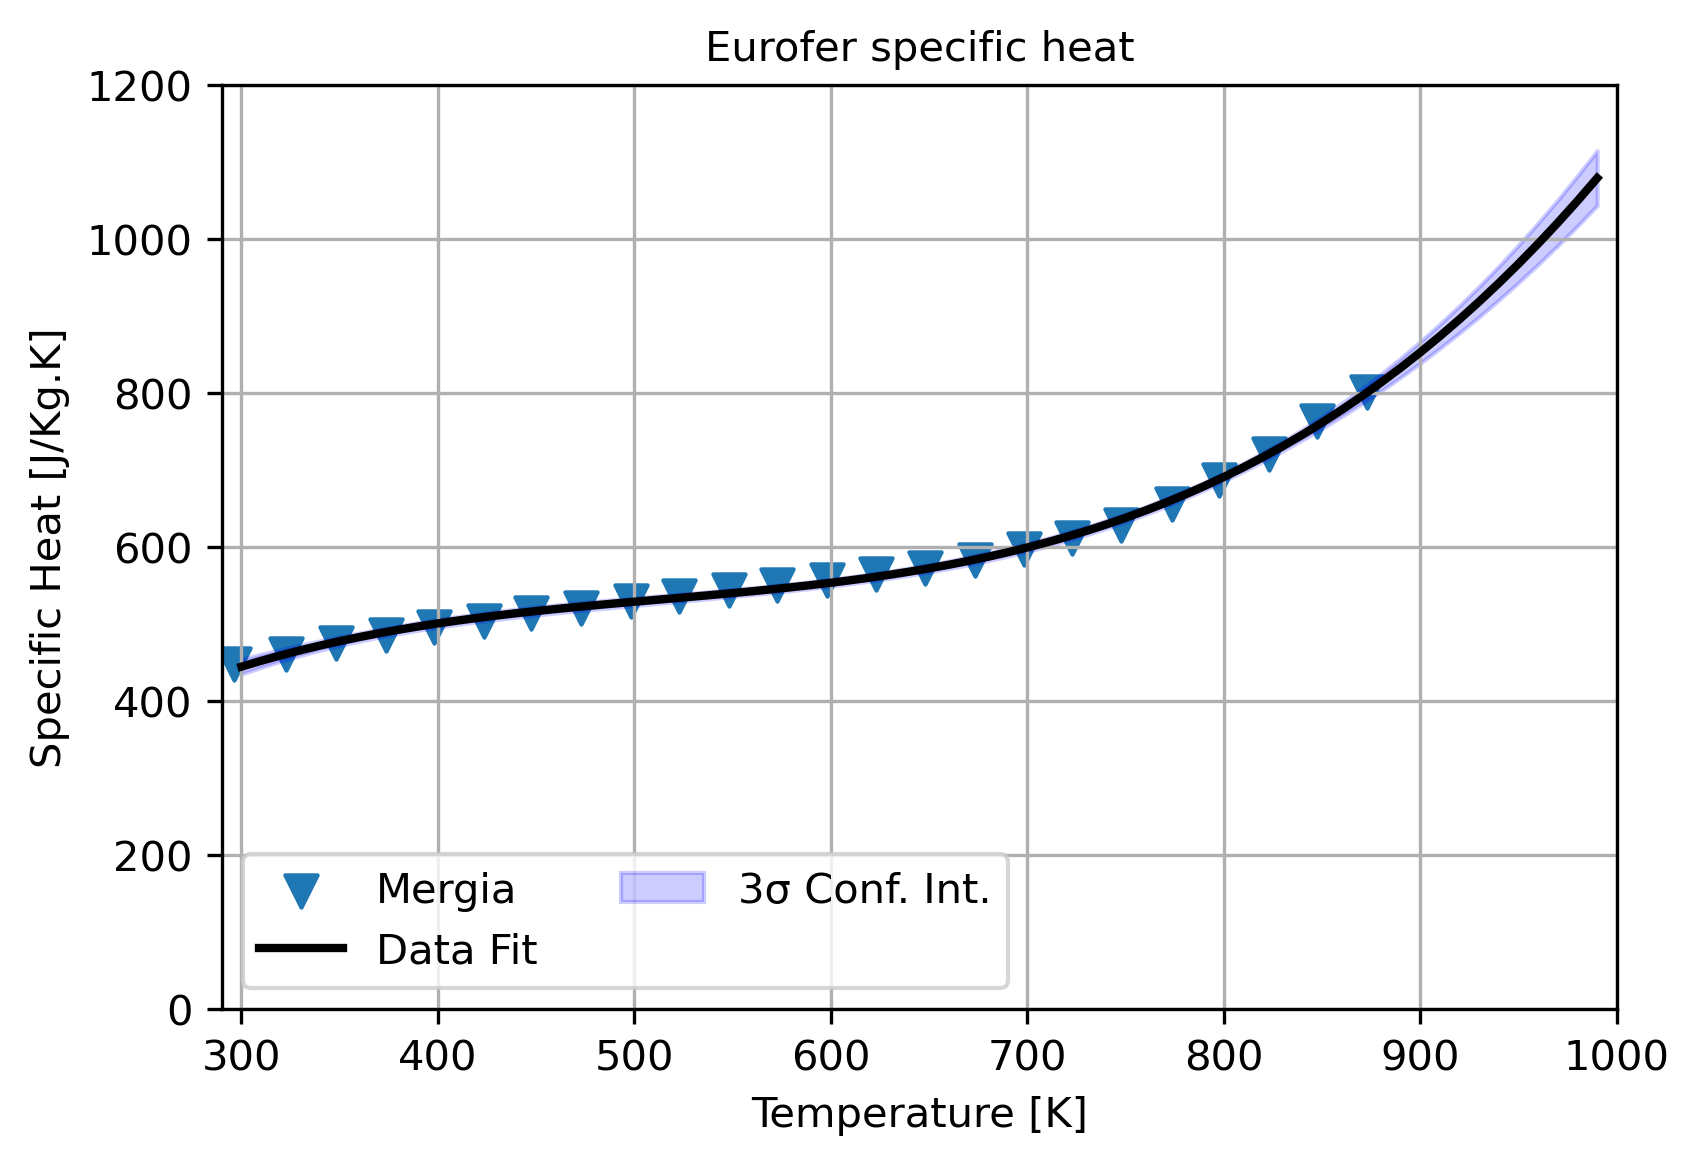

In [4]:
material_property = "Specific Heat"
var_names, variables, df = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=24)
x_label = 'Temperature [K]'
y_label = r'Specific Heat [J/Kg.K]'
x_lim = [290, 1000]
y_lim = [0, 1200]
data_labels = ['Mergia','Chun']
display(Markdown('Data sources: [Mergia2008--Structural, thermal, electrical and magnetic properties of Eurofer 97 steel.pdf](https://drive.google.com/file/d/16dzPWsjkJab4v0_DAryCNMEoq1FnAGZw/view?usp=drive_link)'))

# Concatenate and sort data for fitting?
vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = vars_y

# Fit the data
p = [1, 1, 1, 1]
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=4, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          'Eurofer specific heat', legend_loc='lower left', legend_font_size= 10)

cp_coef = [fit_result.params[key].value for key in fit_result.params]  # Extract parameter values as a list

# Define the polynomial function
def SpecificHeat(T):
    return sum(cp_coef[i] * T**i for i in range(len(cp_coef)))


## 2.4 Thermal Conductivity

,Mergia2008TempK,Mergia2008ThermalConductivitykW/mK
0,295.833333,28.330097
1,322.619048,28.932039
2,372.619048,29.194175
3,473.214286,30.669903
4,572.619048,30.194175
5,672.619048,29.330097
6,772.619048,29.446602
7,872.619048,31.174757


Data sources: [Mergia2008--Structural, thermal, electrical and magnetic properties of Eurofer 97 steel.pdf](https://drive.google.com/file/d/16dzPWsjkJab4v0_DAryCNMEoq1FnAGZw/view?usp=drive_link)

**Fitting parameters for Eurofer Conductivity** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 8
    # variables        = 4
    chi-square         = 0.53472866
    reduced chi-square = 0.13368216
    Akaike info crit   = -13.6434991
    Bayesian info crit = -13.3257329
    R-squared          = 0.91471176
[[Variables]]
    c0:  5.35406896 +/- 4.74527358 (88.63%) (init = 1)
    c1:  0.13612898 +/- 0.02767428 (20.33%) (init = 1)
    c2: -2.3959e-04 +/- 5.0031e-05 (20.88%) (init = 1)
    c3:  1.3455e-07 +/- 2.8454e-08 (21.15%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9965
    C(c1, c2) = -0.9957
    C(c0, c1) = -0.9951
    C(c1, c3) = +0.9849
    C(c0, c2) = +0.9824
    C(c0, c3) = -0.9649


**The equations for Eurofer Conductivity are:**


Fit:


<IPython.core.display.Latex object>

Minimum of confidence interval:


<IPython.core.display.Latex object>

Maximum of confidence interval:


<IPython.core.display.Latex object>

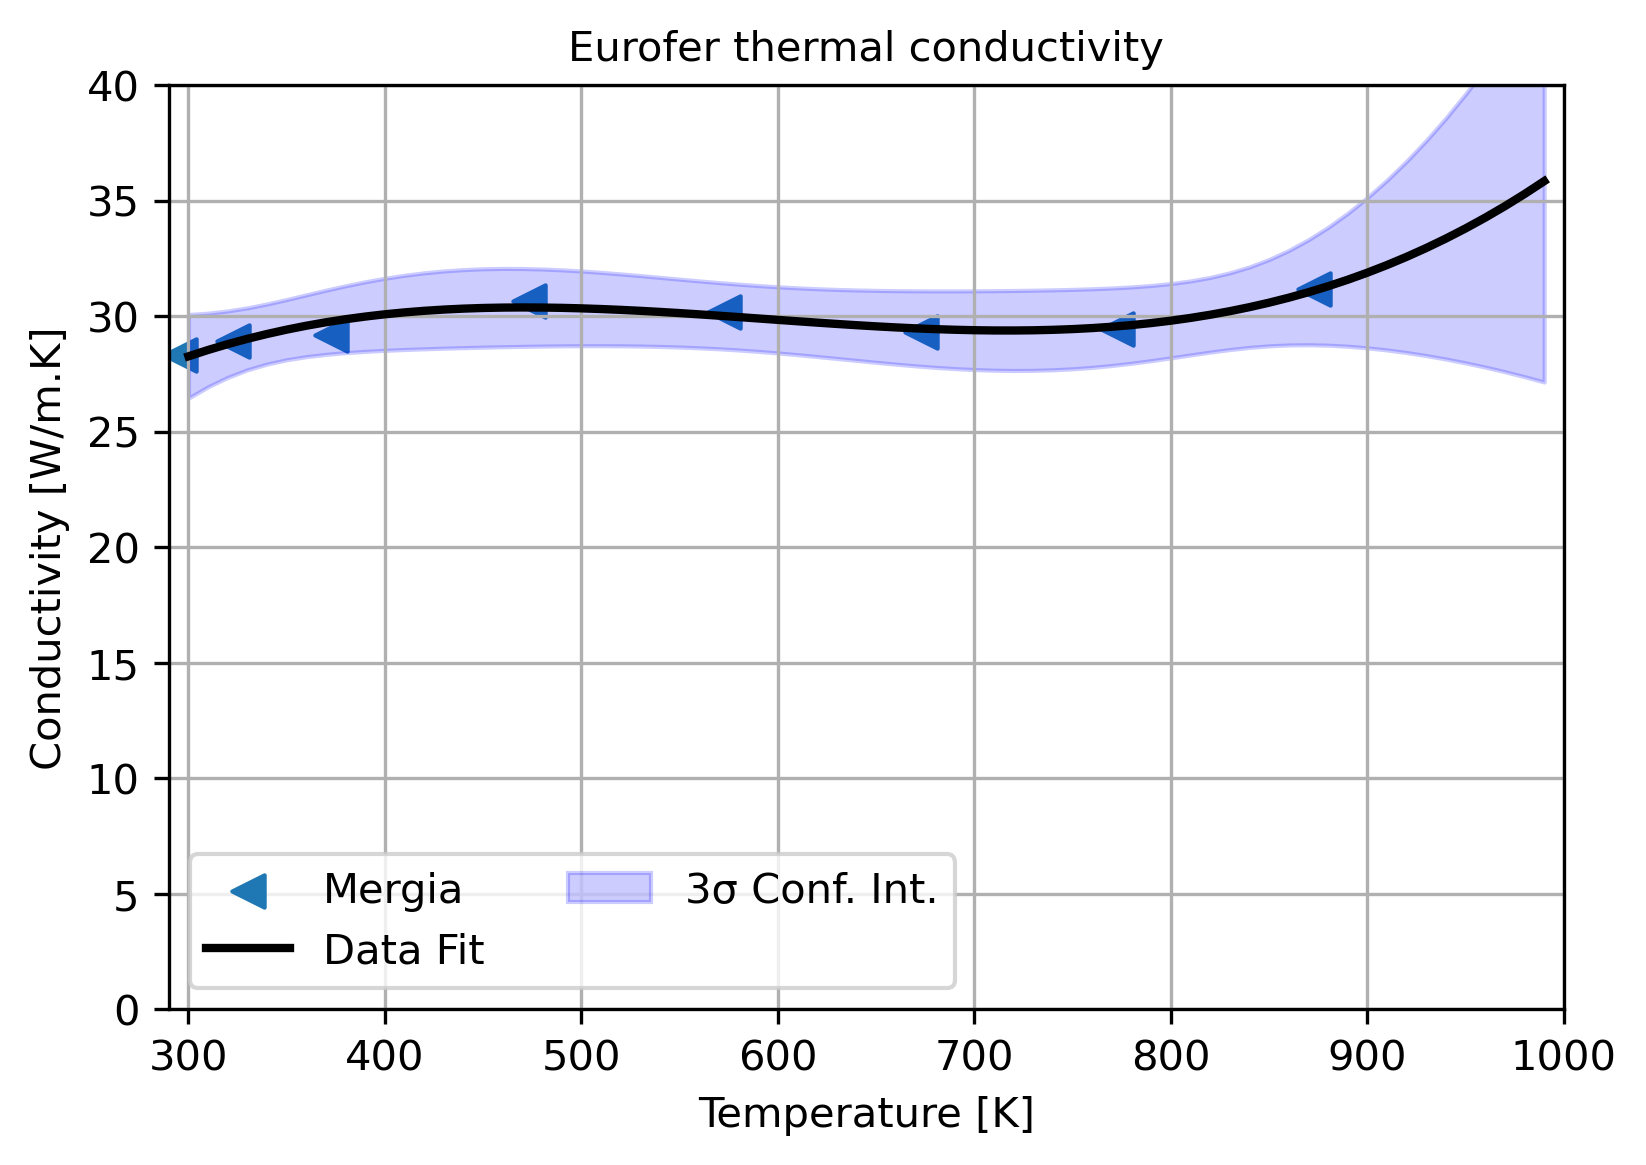

In [5]:
material_property = "Conductivity"
var_names, variables, dataframe = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=13)
x_label ='Temperature [K]'
y_label =r'Conductivity [W/m.K]'
x_lim = [290, 1000]
y_lim = [0, 40]
data_labels = ['Mergia','Chun']
display(Markdown('Data sources: [Mergia2008--Structural, thermal, electrical and magnetic properties of Eurofer 97 steel.pdf](https://drive.google.com/file/d/16dzPWsjkJab4v0_DAryCNMEoq1FnAGZw/view?usp=drive_link)'))

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = vars_y

# Fit the data
p = [1, 1, 1, 1]
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=4, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          'Eurofer thermal conductivity', legend_loc='lower left', legend_font_size= 10)

k_coeff = [fit_result.params[key].value for key in fit_result.params]  # Extract parameter values as a list

# Define the polynomial function
def ThermalConductivity(T):
    return sum(k_coeff[i] * T**i for i in range(len(k_coeff)))


## 2.5 Electrical Resistivity

,EUROFER97MergiaTempK,EUROFER97MergiaElectricalResistivityx108ohmm
0,303.317972,51.077844
1,327.649770,54.550898
2,344.239631,56.467066
3,365.806452,59.101796
4,396.221198,62.814371
5,423.317972,66.407186
6,450.414747,69.281437
7,467.004608,71.437126
8,497.419355,75.508982
9,523.410138,77.425150



**Data Source:**  
- [Mergia2008--Structural, thermal, electrical and magnetic properties of Eurofer 97 steel.pdf](https://drive.google.com/file/d/16dzPWsjkJab4v0_DAryCNMEoq1FnAGZw/view?usp=drive_link)
- [Tavassoli2004a--Materials design data for reduced activation martensitic steel type EUROFER](https://drive.google.com/file/d/1AZkRc7VNqWhjE_3Mg22TUoUSLKh5ByXQ/view?usp=sharing)


**Fitting parameters for Eurofer Resistivity** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 23
    # variables        = 4
    chi-square         = 1.87113879
    reduced chi-square = 0.09848099
    Akaike info crit   = -49.7057808
    Bayesian info crit = -45.1638040
    R-squared          = 0.99982324
[[Variables]]
    c0:  15.6365130 +/- 2.48311631 (15.88%) (init = 1)
    c1:  0.11058275 +/- 0.01348806 (12.20%) (init = 1)
    c2:  3.4060e-05 +/- 2.3101e-05 (67.82%) (init = 1)
    c3: -3.2423e-08 +/- 1.2582e-08 (38.81%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9957
    C(c1, c2) = -0.9947
    C(c0, c1) = -0.9934
    C(c1, c3) = +0.9813
    C(c0, c2) = +0.9772
    C(c0, c3) = -0.9551


**The equations for Eurofer Resistivity are:**


Fit:


<IPython.core.display.Latex object>

Minimum of confidence interval:


<IPython.core.display.Latex object>

Maximum of confidence interval:


<IPython.core.display.Latex object>

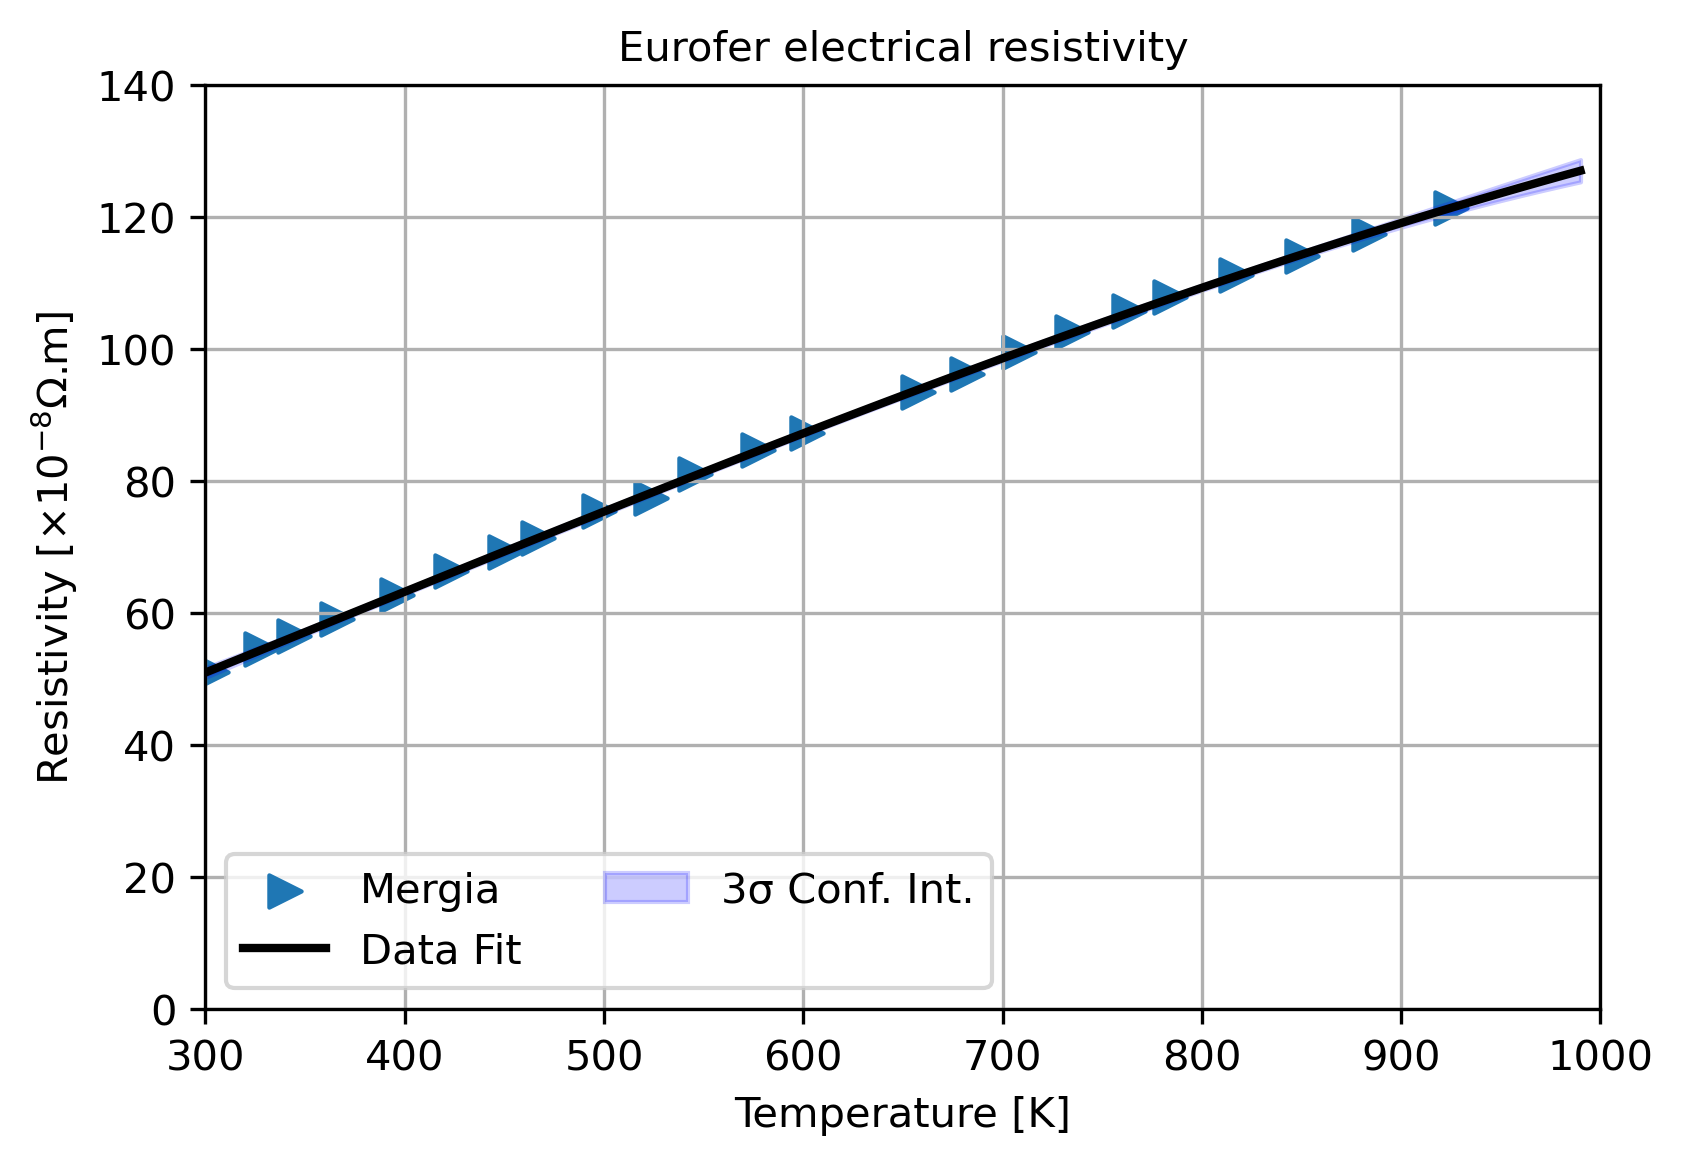

In [6]:
material_property = "Resistivity"
var_names, variables, df = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=23)
x_label='Temperature [K]'
y_label=r'Resistivity [$\times 10^{-8} \Omega$.m]'
x_lim=[300, 1000]
y_lim=[0, 140]
data_labels = ['Mergia', 'Tavassoli 2004']

display(Markdown("""
**Data Source:**  
- [Mergia2008--Structural, thermal, electrical and magnetic properties of Eurofer 97 steel.pdf](https://drive.google.com/file/d/16dzPWsjkJab4v0_DAryCNMEoq1FnAGZw/view?usp=drive_link)
- [Tavassoli2004a--Materials design data for reduced activation martensitic steel type EUROFER](https://drive.google.com/file/d/1AZkRc7VNqWhjE_3Mg22TUoUSLKh5ByXQ/view?usp=sharing)
"""))


# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = vars_y

# Fit the data
p = [1, 1, 1, 1]
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=4, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          'Eurofer electrical resistivity', legend_loc='lower left', legend_font_size= 10)

rho_coeff = [fit_result.params[key].value for key in fit_result.params]  # Extract parameter values as a list

# Define the polynomial function
def ElectricalResistivity(T):
    return sum(rho_coeff[i] * T**i for i in range(len(rho_coeff)))


## 2.6 Coefficient of Thermal Expansion

,F82HJAERIdataTK,F82HJAERIdataCoefficientofThermalExpansion106/K
0,373,10.7
1,473,11.0
2,573,11.2
3,673,11.7
4,773,12.0
5,873,12.3
6,973,12.5


Data source: [Chun2015--Physical, thermal, magnetic and mechanical properties of ARAA.pdf](https://drive.google.com/file/d/15JGrEKLVA3zK68GzqVqqQsM0OUx-JrrP/view?usp=drive_link)

**Fitting parameters for Eurofer CTE** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 7
    # variables        = 4
    chi-square         = 0.01166667
    reduced chi-square = 0.00388889
    Akaike info crit   = -36.7785076
    Bayesian info crit = -36.9948670
    R-squared          = 0.99582481
[[Variables]]
    c0:  11.4643892 +/- 1.13204718 (9.87%) (init = 1)
    c1: -0.00695608 +/- 0.00554590 (79.73%) (init = 1)
    c2:  1.6349e-05 +/- 8.5938e-06 (52.57%) (init = 1)
    c3: -8.3333e-09 +/- 4.2431e-09 (50.92%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9969
    C(c1, c2) = -0.9960
    C(c0, c1) = -0.9949
    C(c1, c3) = +0.9860
    C(c0, c2) = +0.9826
    C(c0, c3) = -0.9660


**The equations for Eurofer CTE are:**


Fit:


<IPython.core.display.Latex object>

Minimum of confidence interval:


<IPython.core.display.Latex object>

Maximum of confidence interval:


<IPython.core.display.Latex object>

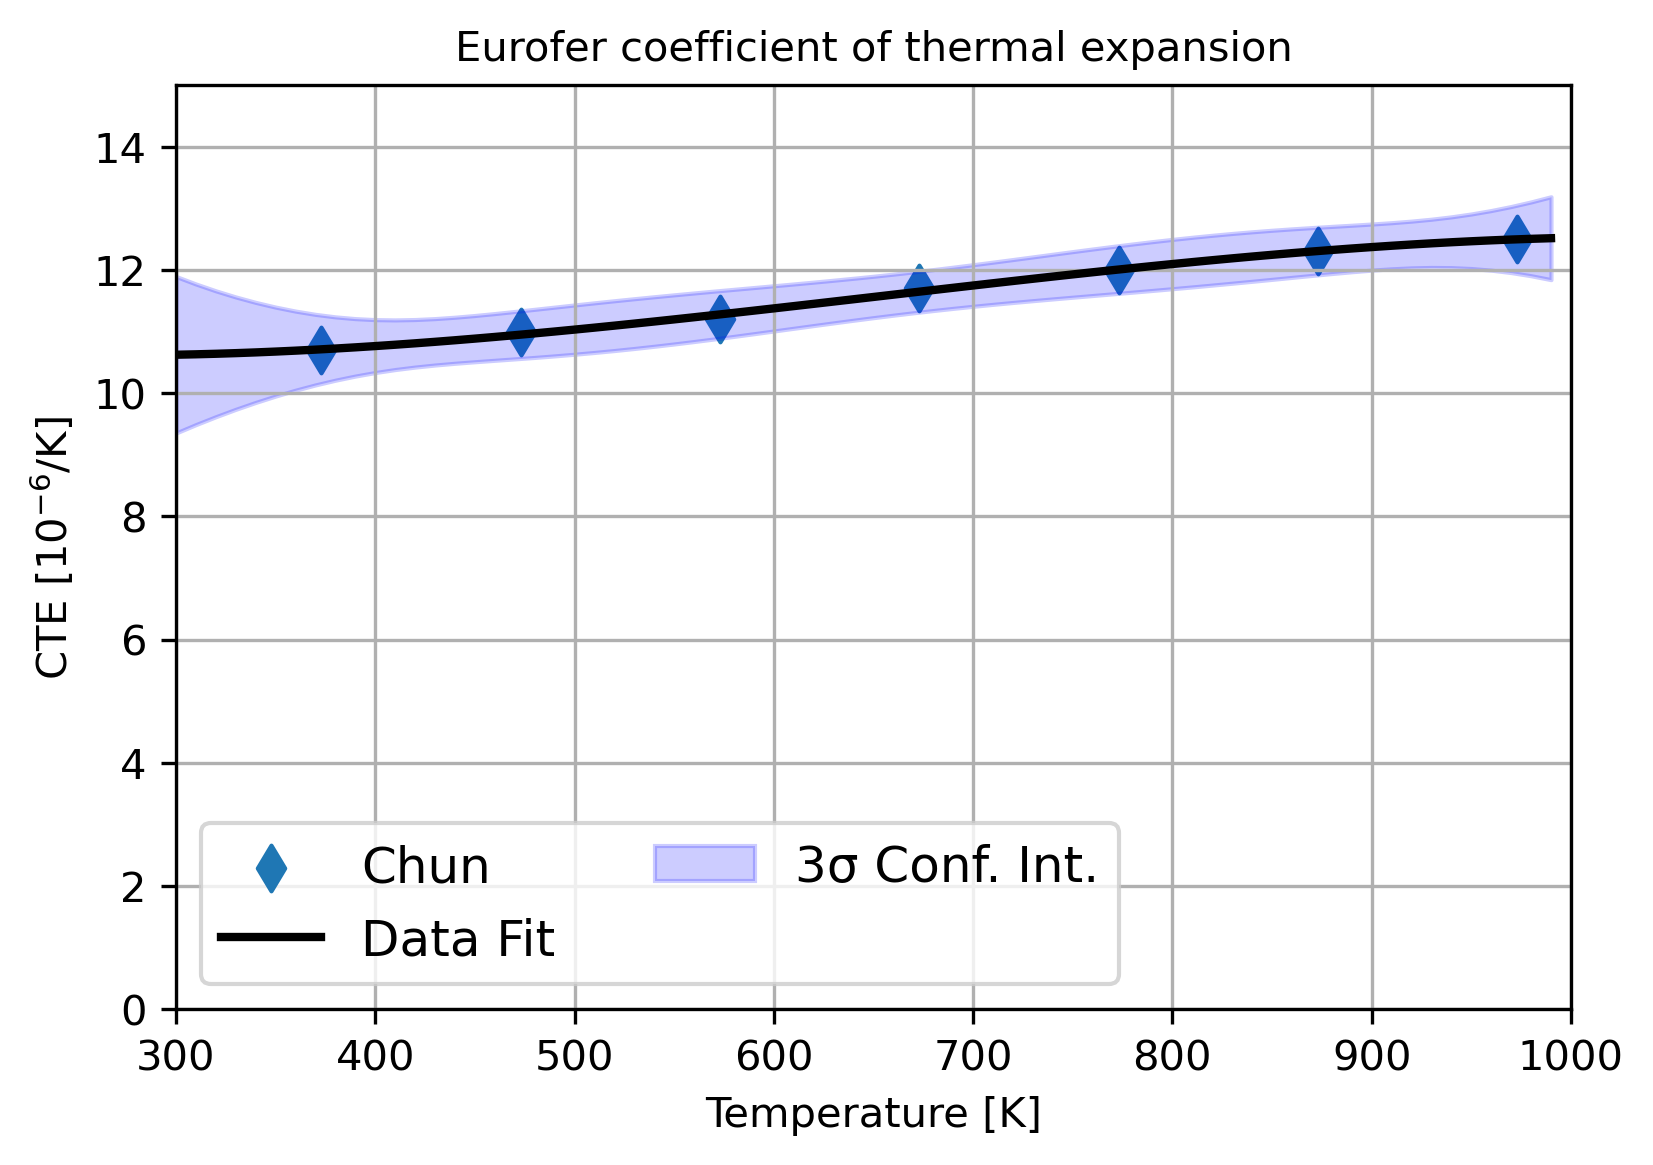

In [7]:
material_property = "CTE"
var_names, variables, dataframe = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=7)

x_label='Temperature [K]'
y_label=r'CTE [$10^{-6}$/K]'
x_lim=[300, 1000]
y_lim=[0, 15]
data_labels = ['Chun']
display(Markdown('Data source: [Chun2015--Physical, thermal, magnetic and mechanical properties of ARAA.pdf](https://drive.google.com/file/d/15JGrEKLVA3zK68GzqVqqQsM0OUx-JrrP/view?usp=drive_link)'))


# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = vars_y

# Fit the data
p = [1, 1, 1, 1]
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=4, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          'Eurofer coefficient of thermal expansion', legend_loc='lower left', legend_font_size= 12)

CTE_coef = [fit_result.params[key].value for key in fit_result.params]  # Extract parameter values as a list

# Define the polynomial function
def CTE(T):
    return sum(CTE_coef[i] * T**i for i in range(len(CTE_coef)))


## 2.7 Thermal Emissivity

,Echaniz2021AsrolledTempK,Echaniz2021AsrolledHemisphericalEmissivity,Echaniz2021PolishedTempK1,Echaniz2021PolishedHemisphericalEmissivity1,Echaniz2021polishedTempK2,Echaniz2021polishedNormalEmissivity
0,473.100872,0.180080,430.136986,0.116901,423,0.083535
1,573.225405,0.214688,524.283935,0.128974,523,0.100909
2,672.976339,0.245272,624.034869,0.142656,623,0.120303
3,772.727273,0.273843,724.906600,0.156338,723,0.140707
4,872.851806,0.302012,820.921544,0.176459,823,0.162929


Data source: [Echániz2021--Infrared emissivity of reduced-activation Eurofer 97 for fusion reactor applications.pdf](https://drive.google.com/file/d/15WAtb9fnB73IWu2IZsVDIzZr1t4QoURX/view?usp=drive_link)

**Fitting parameters for Eurofer Emissivity** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 5
    # variables        = 3
    chi-square         = 5.1307e-08
    reduced chi-square = 2.5653e-08
    Akaike info crit   = -85.9744103
    Bayesian info crit = -87.1460965
[[Variables]]
    c0:  0.02611194 +/- 0.00160870 (6.16%) (init = 1)
    c1:  1.0329e-04 +/- 5.3577e-06 (5.19%) (init = 1)
    c2:  7.6479e-08 +/- 4.2806e-09 (5.60%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, c2) = -0.9955
    C(c0, c1) = -0.9937
    C(c0, c2) = +0.9796


**The equations for Eurofer Emissivity are:**


Fit:


<IPython.core.display.Latex object>

Minimum of confidence interval:


<IPython.core.display.Latex object>

Maximum of confidence interval:


<IPython.core.display.Latex object>

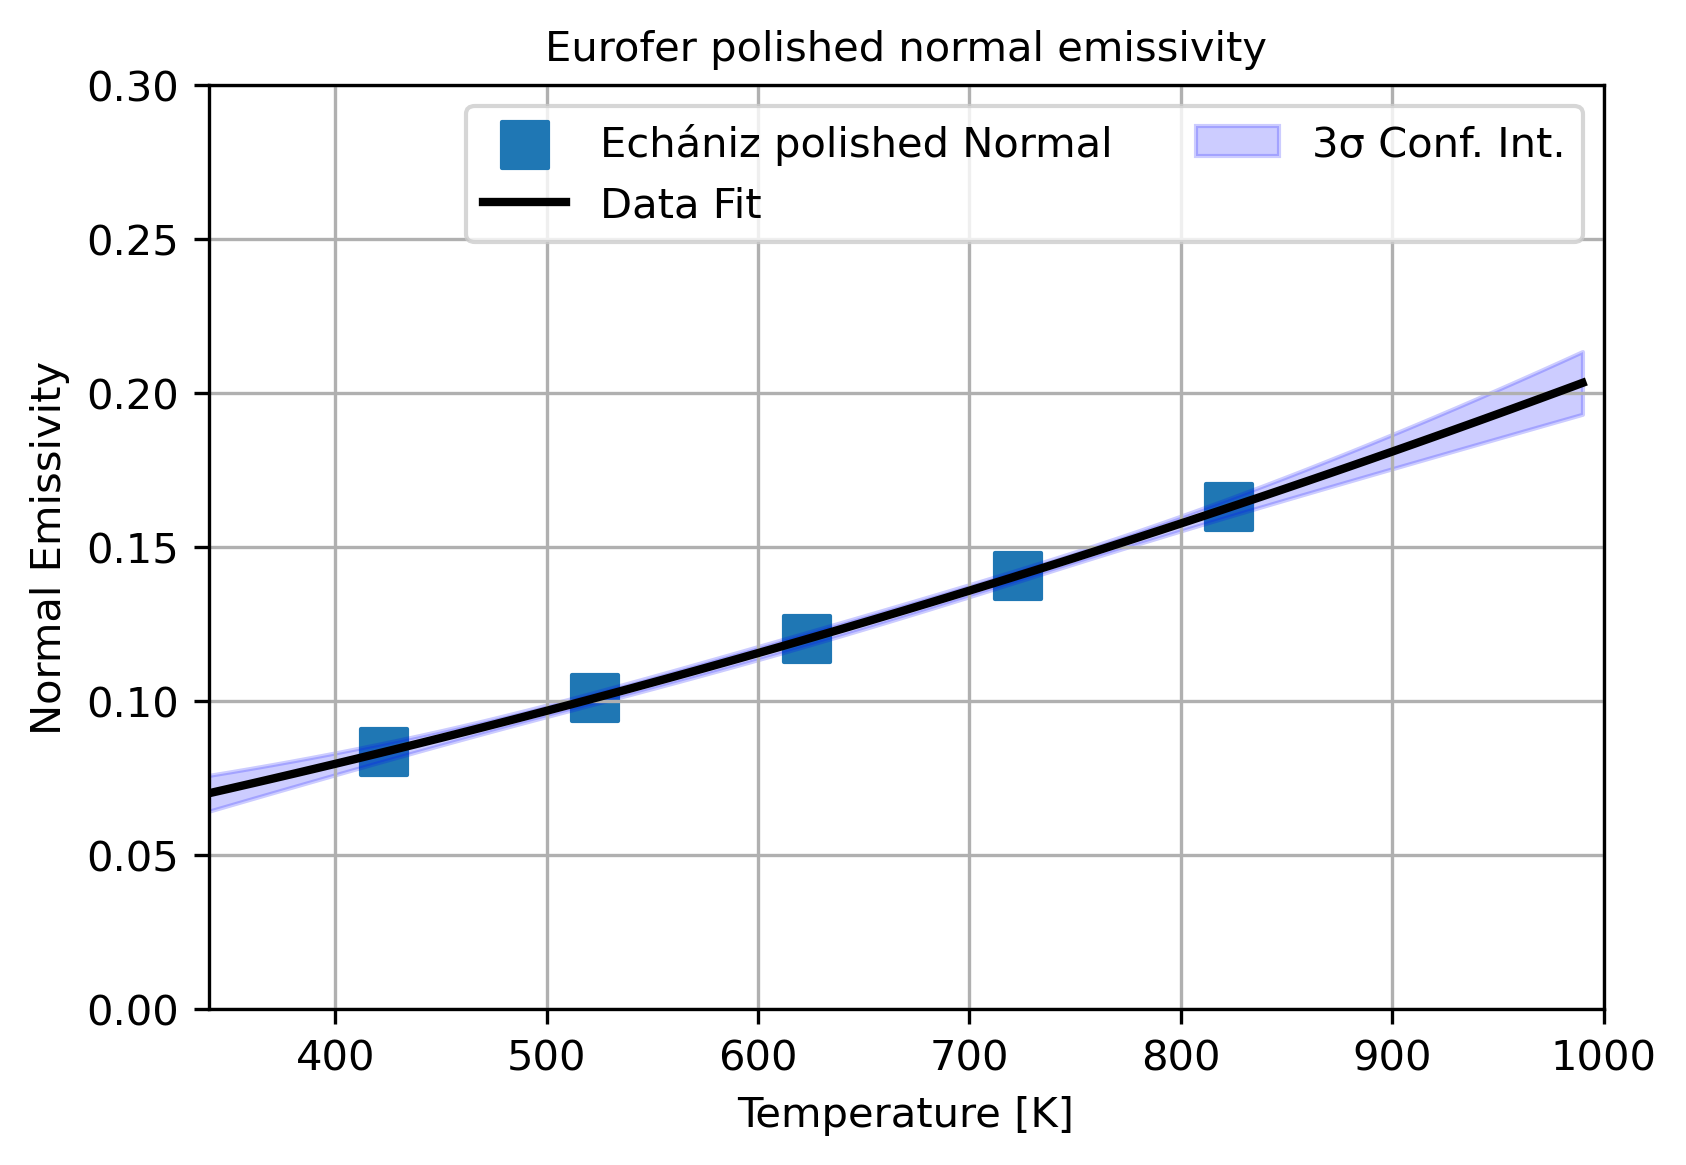

In [8]:
material_property = "Emissivity"
var_names, variables, dataframe = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=5)
x_label = 'Temperature [K]'
y_label = r'Normal Emissivity'
x_lim=[340, 1000]
y_lim=[0, 0.3]
data_labels = ['Echániz polished Normal']
display(Markdown('Data source: [Echániz2021--Infrared emissivity of reduced-activation Eurofer 97 for fusion reactor applications.pdf](https://drive.google.com/file/d/15WAtb9fnB73IWu2IZsVDIzZr1t4QoURX/view?usp=drive_link)'))

vars_x = variables[::2]
vars_y = variables[1::2]

# Creating lists with only the first column
x_data_list = [vars_x[2]]
y_data_list = [vars_y[2]]
# Extract only the third element from vars_x and vars_y
T_data = x_data_list
Y_data = y_data_list

# Fit the data
p = [1, 1, 1]
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=4, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, 2*m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          'Eurofer polished normal emissivity', legend_font_size= 10)

emit1_coef = [fit_result.params[key].value for key in fit_result.params]  # Extract parameter values as a list

# Define the polynomial function
def NormalEmissivity(T):
    return sum(emit1_coef[i] * T**i for i in range(len(emit1_coef)))


,Echaniz2021AsrolledTempK,Echaniz2021AsrolledHemisphericalEmissivity,Echaniz2021PolishedTempK1,Echaniz2021PolishedHemisphericalEmissivity1,Echaniz2021polishedTempK2,Echaniz2021polishedNormalEmissivity
0,473.100872,0.180080,430.136986,0.116901,423,0.083535
1,573.225405,0.214688,524.283935,0.128974,523,0.100909
2,672.976339,0.245272,624.034869,0.142656,623,0.120303
3,772.727273,0.273843,724.906600,0.156338,723,0.140707
4,872.851806,0.302012,820.921544,0.176459,823,0.162929


Data source: [Echániz2021--Infrared emissivity of reduced-activation Eurofer 97 for fusion reactor applications.pdf](https://drive.google.com/file/d/15WAtb9fnB73IWu2IZsVDIzZr1t4QoURX/view?usp=drive_link)

**Fitting parameters for Eurofer Emissivity** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 5
    # variables        = 3
    chi-square         = 1.1546e-06
    reduced chi-square = 5.7731e-07
    Akaike info crit   = -70.4058615
    Bayesian info crit = -71.5775477
[[Variables]]
    c0: -0.00702720 +/- 0.00895193 (127.39%) (init = 1)
    c1:  4.4657e-04 +/- 2.7457e-05 (6.15%) (init = 1)
    c2: -1.0643e-07 +/- 2.0321e-08 (19.09%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, c2) = -0.9962
    C(c0, c1) = -0.9948
    C(c0, c2) = +0.9828


**The equations for Eurofer Emissivity are:**


Fit:


<IPython.core.display.Latex object>

Minimum of confidence interval:


<IPython.core.display.Latex object>

Maximum of confidence interval:


<IPython.core.display.Latex object>

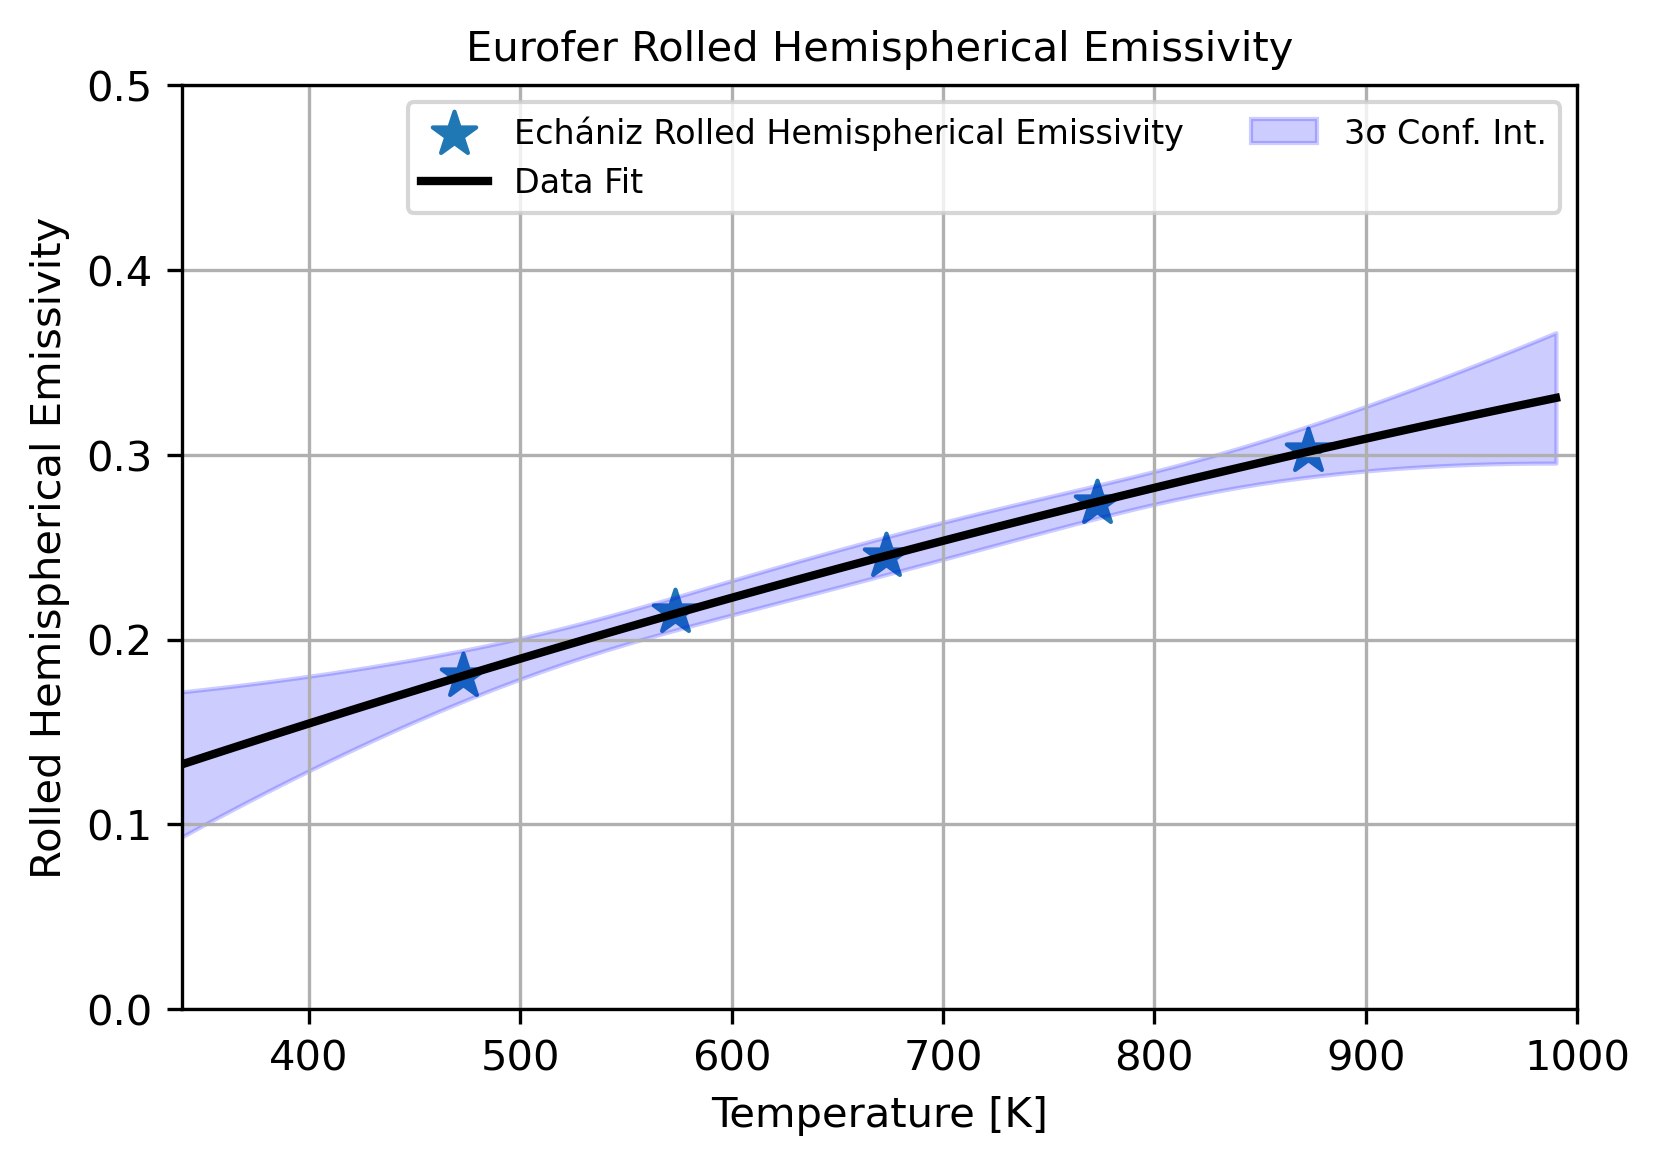

In [9]:
material_property = "Emissivity"
var_names, variables, dataframe = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=5)
x_label = 'Temperature [K]'
y_label = r'Rolled Hemispherical Emissivity'
x_lim=[340, 1000]
y_lim=[0, 0.5]
data_labels = ['Echániz Rolled Hemispherical Emissivity']
display(Markdown('Data source: [Echániz2021--Infrared emissivity of reduced-activation Eurofer 97 for fusion reactor applications.pdf](https://drive.google.com/file/d/15WAtb9fnB73IWu2IZsVDIzZr1t4QoURX/view?usp=drive_link)'))

vars_x = variables[::2]
vars_y = variables[1::2]

# Creating lists with only the first column
x_data_list = [vars_x[0]]
y_data_list = [vars_y[0]]
# Extract only the first element from vars_x and vars_y
T_data = x_data_list
Y_data = y_data_list

# Fit the data
p = [1, 1, 1]
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=4, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, 2*m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          'Eurofer Rolled Hemispherical Emissivity', legend_font_size= 8)

emit2_coeff = [fit_result.params[key].value for key in fit_result.params]  # Extract parameter values as a list

# Define the polynomial function
def RolledHemisphericalEmissivity(T):
    return sum(emit2_coeff[i] * T**i for i in range(len(emit2_coeff)))


,Echaniz2021AsrolledTempK,Echaniz2021AsrolledHemisphericalEmissivity,Echaniz2021PolishedTempK1,Echaniz2021PolishedHemisphericalEmissivity1,Echaniz2021polishedTempK2,Echaniz2021polishedNormalEmissivity
0,473.100872,0.180080,430.136986,0.116901,423,0.083535
1,573.225405,0.214688,524.283935,0.128974,523,0.100909
2,672.976339,0.245272,624.034869,0.142656,623,0.120303
3,772.727273,0.273843,724.906600,0.156338,723,0.140707
4,872.851806,0.302012,820.921544,0.176459,823,0.162929


Data source: [Echániz2021--Infrared emissivity of reduced-activation Eurofer 97 for fusion reactor applications.pdf](https://drive.google.com/file/d/15WAtb9fnB73IWu2IZsVDIzZr1t4QoURX/view?usp=drive_link)

**Fitting parameters for Eurofer Emissivity** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 5
    # variables        = 3
    chi-square         = 5.0657e-06
    reduced chi-square = 2.5329e-06
    Akaike info crit   = -63.0122378
    Bayesian info crit = -64.1839240
[[Variables]]
    c0:  0.09421098 +/- 0.01702700 (18.07%) (init = 1)
    c1:  4.0998e-06 +/- 5.6421e-05 (1376.18%) (init = 1)
    c2:  1.1591e-07 +/- 4.4909e-08 (38.75%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, c2) = -0.9959
    C(c0, c1) = -0.9943
    C(c0, c2) = +0.9813


**The equations for Eurofer Emissivity are:**


Fit:


<IPython.core.display.Latex object>

Minimum of confidence interval:


<IPython.core.display.Latex object>

Maximum of confidence interval:


<IPython.core.display.Latex object>

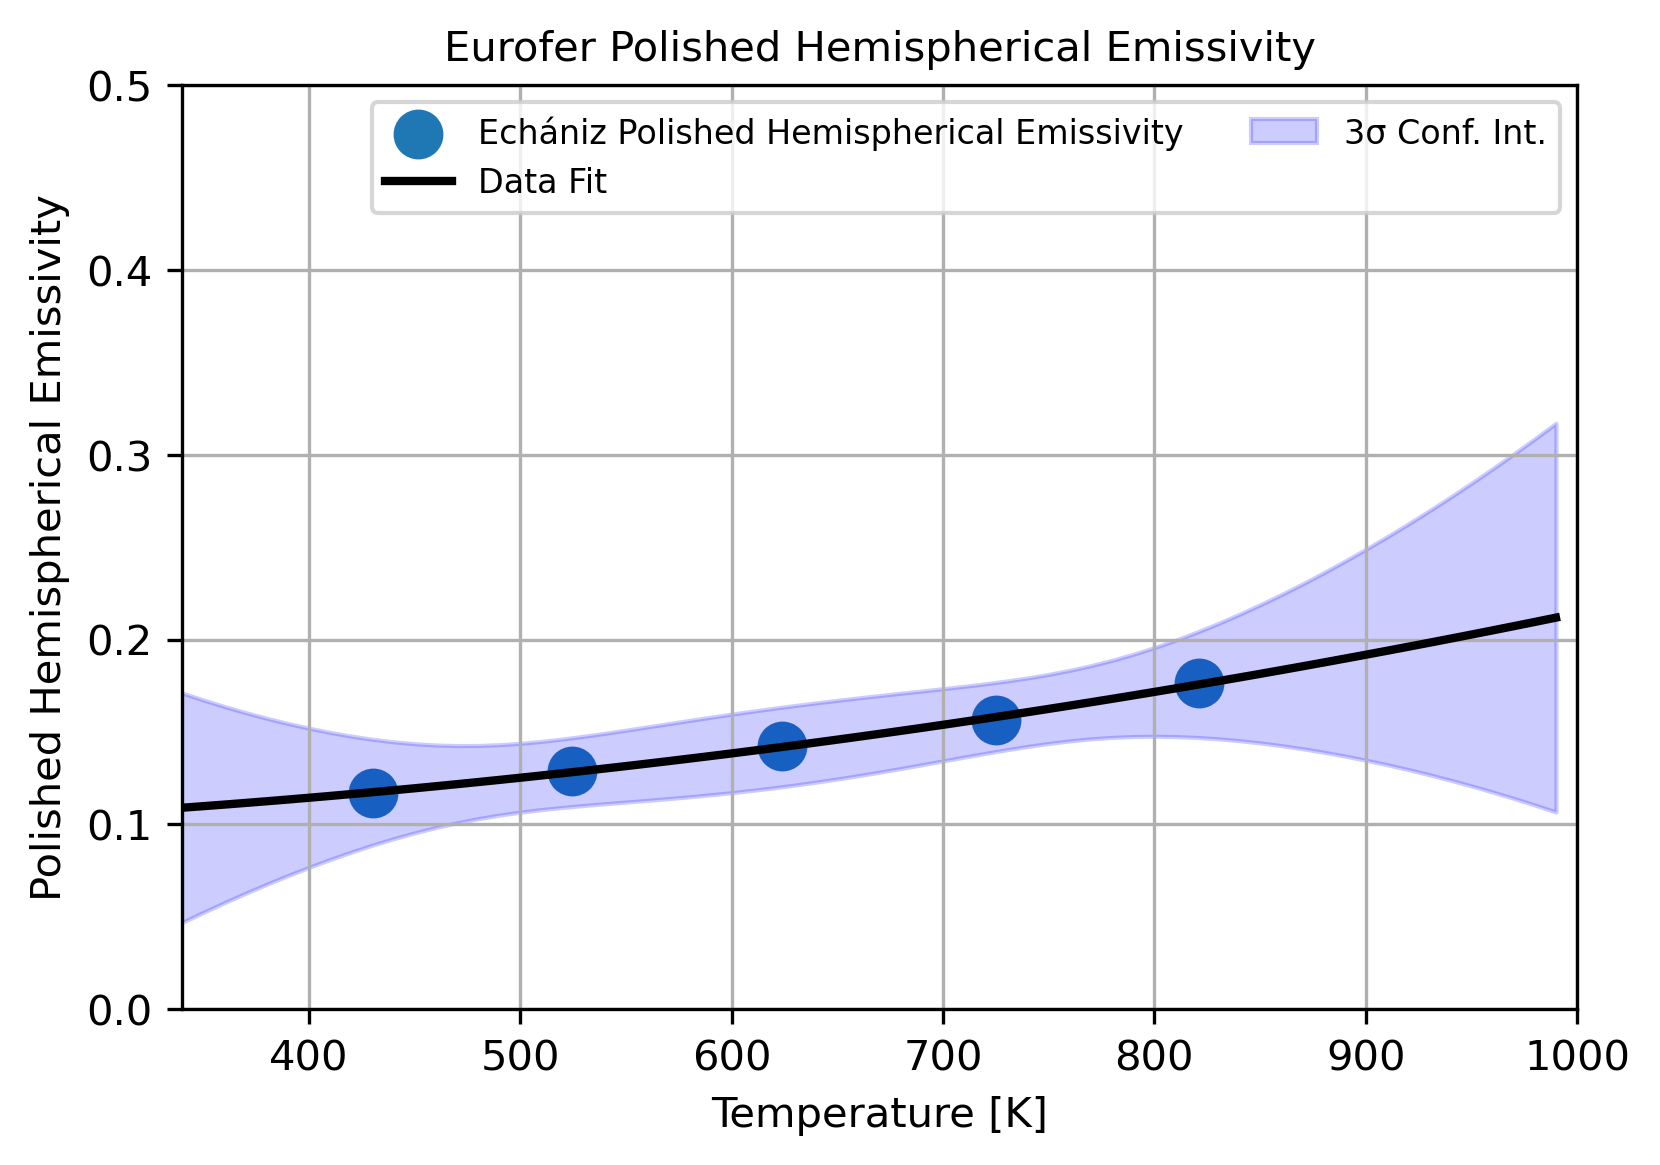

In [10]:
material_property = "Emissivity"
var_names, variables, dataframe = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=5)
x_label = 'Temperature [K]'
y_label = r'Polished Hemispherical Emissivity'
x_lim=[340, 1000]
y_lim=[0, 0.5]
data_labels = ['Echániz Polished Hemispherical Emissivity']
display(Markdown('Data source: [Echániz2021--Infrared emissivity of reduced-activation Eurofer 97 for fusion reactor applications.pdf](https://drive.google.com/file/d/15WAtb9fnB73IWu2IZsVDIzZr1t4QoURX/view?usp=drive_link)'))

vars_x = variables[::2]
vars_y = variables[1::2]

# Creating lists with only the first column
x_data_list = [vars_x[1]]
y_data_list = [vars_y[1]]
# Extract only the first element from vars_x and vars_y
T_data = x_data_list
Y_data = y_data_list

# Fit the data
p = [1, 1, 1]
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=4, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, 2*m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          'Eurofer Polished Hemispherical Emissivity', legend_font_size= 8)

emit3_coeff = [fit_result.params[key].value for key in fit_result.params]  # Extract parameter values as a list

# Define the polynomial function
def PolishedHemisphericalEmissivity(T):
    return sum(emit3_coeff[i] * T**i for i in range(len(emit3_coeff)))

## 2.8 Magnetic Properties